# Classificação: Seleção de Features

Nosso objetivo é analisar dados de um hotel e ajustar um modelo de ML que auxilie o hotel a identificar clientes que vão cancelar ou manter uma reserva. Desse modo, o hotel pode promover alguma ação para reter potenciais clientes que podem cancelar a reserva.

Do conteúdo do curso: "A escolha adequada das features é crucial, pois impacta diretamente na capacidade do modelo de capturar relações significativas e fazer previsões precisas. Features bem selecionadas ajudam a evitar a inclusão de ruído desnecessário, tornando o modelo mais eficiente e eficaz. Além disso, a análise das features pode revelar insights valiosos sobre os dados, permitindo uma compreensão mais profunda do problema em questão."

In [1]:
import pandas as pd

df = pd.read_csv('./hotel.csv')
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,2,2,0,82,2018,10,30,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,109,2017,7,16,0,...,0,0,0,0,0,0,0,0,1,1
2,2,0,0,1,0,105,2018,4,6,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,3,0,13,2018,4,19,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,2,0,81,2018,8,5,0,...,1,0,0,0,0,0,0,0,1,1


Verificando se há valores nulos. O primeiro `sum` faz a soma por coluna do dataframe, e o segundo `sum` faz a soma dos resultados da soma anterior.

In [2]:
df.isnull().sum().sum()

0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34146 entries, 0 to 34145
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          34146 non-null  int64  
 1   no_of_children                        34146 non-null  int64  
 2   no_of_weekend_nights                  34146 non-null  int64  
 3   no_of_week_nights                     34146 non-null  int64  
 4   required_car_parking_space            34146 non-null  int64  
 5   lead_time                             34146 non-null  int64  
 6   arrival_year                          34146 non-null  int64  
 7   arrival_month                         34146 non-null  int64  
 8   arrival_date                          34146 non-null  int64  
 9   repeated_guest                        34146 non-null  int64  
 10  no_of_previous_cancellations          34146 non-null  int64  
 11  no_of_previous_

Verificando o balanceamento dos dados:

In [4]:
df['booking_status'].value_counts()

0    17073
1    17073
Name: booking_status, dtype: int64

Separação dos dados:

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['booking_status'], axis=1)
y = df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=50)

Criação do modelo (Random Forest) com parâmetros default:

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=2)

In [7]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [8]:
model.score(X_test, y_test)

0.920636470128856

## Análise visual das features

Vamos criar boxplots e violin plots para analisarmos visualmente o comportamento de 2 features: `arrival_month`, o mês em que o hóspede irá chegar e `lead_time`, quanto tempo se passou desde que a reserva foi feita (uma reserva antecipada para o Natal feita em julho, por exemplo). Os dados em cada gráfico serão separados pelos valores na variável alvo, para que possamos ver se há semelhanças/diferenças na distribuição dos dados entre pessoas que cancelaram ou não a reserva.

Iremos focar somente nos dados de **treino**, para evitar qualquer vazamento dos dados de teste. São com esses dados que o modelo irá treinar, então vamos focar neles.

In [9]:
import seaborn as sns

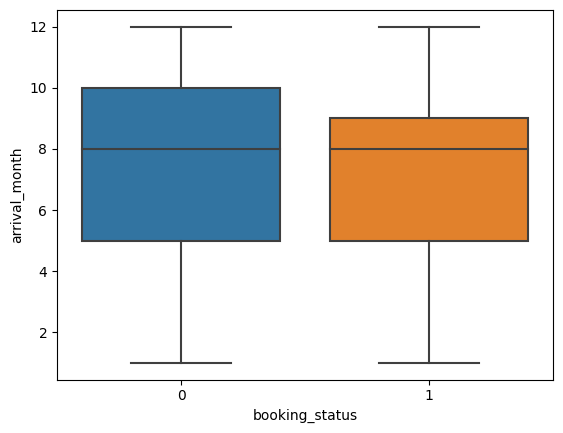

In [10]:
sns.boxplot(X_train, x=y_train, y='arrival_month');

Pelo boxplot, não parece haver muita diferença nos dados. A mediana parece ser a mesma para as duas classes.

Vamos utilizar o violinplot para ver como os dados estão distribuídos a cada mês:

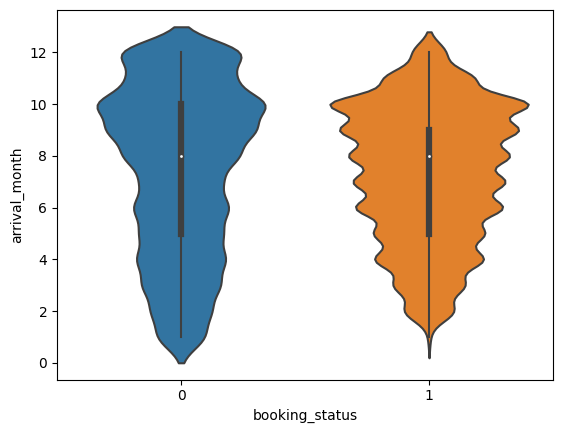

In [11]:
sns.violinplot(X_train, x=y_train, y='arrival_month');

Aqui podemos distinguir melhor as diferenças na distribuição dos dados por mês. 

A contribuição da feature `arrival_month` parece ser pequena para identificar entre uma classe e outra da variável alvo. Features com maior variação entre as classes podem ser mais informativas para o modelo de ML.

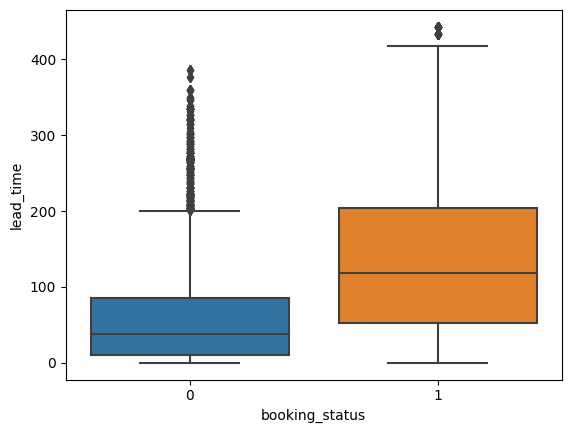

In [12]:
sns.boxplot(X_train, x=y_train, y='lead_time');

Para a feature `lead_time`, podemos identificar uma variação e diferença maior dos dados entre as duas classes. Grande parte dos cancelamentos parecem ocorrem em um tempo maior de `lead_time`. Essa é uma coluna que possivelmente tem uma contribuição maior na aplicação do ML.

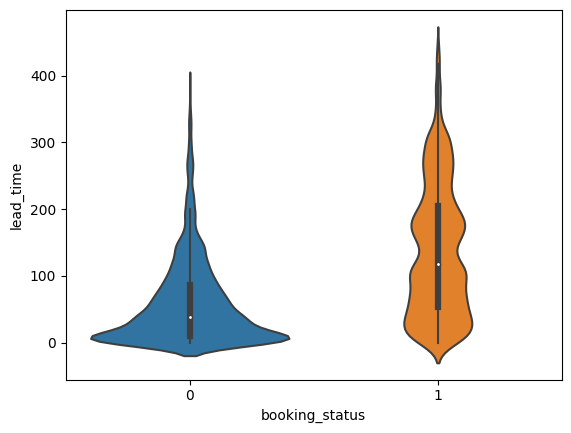

In [13]:
sns.violinplot(X_train, x=y_train, y='lead_time');

Pelo violin plot, podemos observar uma tendência de haver poucos cancelamentos quando a reserva é feita próxima da data que a pessoa irá chegar.

## Análise das features por meio de correlação

Analisar visualmente coluna por coluna pode ser trabalhoso ou até inviável. Outra maneira de se analisar quais features são importantes é por meio da correlação linear entre as colunas. Isso pode ser feito com a função `corr` do pandas, que nos retorna uma matriz de correlação das colunas. 

Para destacar visualmente o valores maiores e menores de correção, podemos utilizar um heatmap.

In [14]:
# creating a single dataframe with training data
# putting y_train first so it is easier to compare it with the other columns
correlation = pd.concat([y_train, X_train], axis=1).corr()

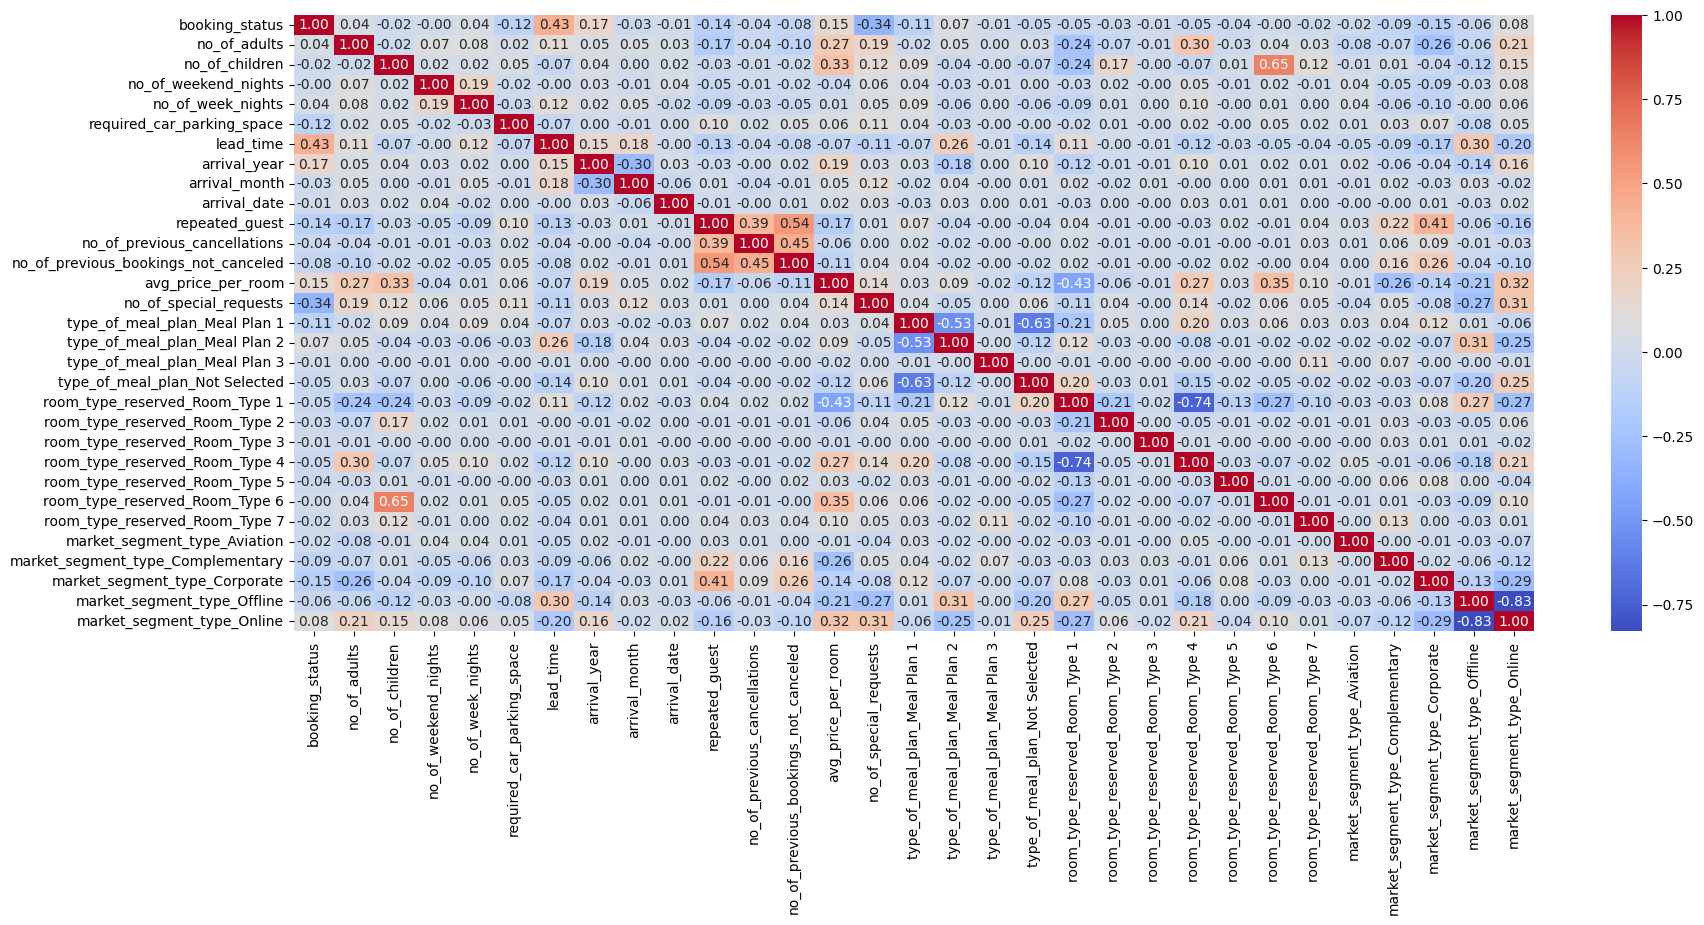

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
# show the correlation value on each cell, up to 2 decimal points
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm');

### Interpretando o heatmap

No heatmap, valores muito próximos de 1 vão ficando mais vermelhos e valores muito próximos de -1 vão ficando mais azuis. **São esses valores que irão nos interessar**, pois indicam features que provavelmente têm uma importância grande no ajuste do modelo de ML (correlação forte positiva e correlação forte negativa). Valores muito próximos de zero (cor mais clara) provavelmente não possuem contribuição muito grande para o modelo de ML.

Primeiro, analisamos a coluna da variável alvo, `booking_status`, verificando os valores de correlação entre ela e as outras colunas do dataset. Assim, conseguimos identificar quais features estão mais correlacionadas com a variável alvo.

Depois, analisamos as correlações entre as outras colunas. Colunas diferentes que possuem um valor de correlação **muito próximo de 1** é um indício de que ambas contribuem de maneira semelhante ao modelo, então uma delas poderia ser **considerada para ser eliminada (redução de redundância)**. Observe, por exemplo, a correlação entre `room_type_reserved_Room_Type 6` e `no_of_children`, que é de 0.65. É um valor alto, mas ainda assim não tão próximo de 1, então talvez não seja interessante eliminar uma dessas colunas. Mas podemos ter um insight de que esse tipo de quarto provavelmente é o mais preferido por famílias com crianças. Já as colunas `market_segment_type_Offline` e `market_segment_type_Online` possuem um valor próximo de 1 (0.83), então talvez poderíamos eliminar uma delas (essa era provavelmente uma única coluna originalmente, com valor categórico binário - online e offline - que foi dividida em duas pela utilização do `get_dummies` em algum momento anterior de tratamento dos dados.)

**Atenção:** a correlação pega uma relação linear entre uma coluna e outra. Alguns modelos de ML, como as árvores de decisão, podem também utilizar relações **não-lineares** dentre as features. Então, *não devemos nos ater somente na correlação para a escolha das features*. Ela é uma das ferramentas de seleção que temos disponíveis, e que deve ser combinada com outras técnicas de seleção, bem como a pessoa que está analisando os dados deve ter uma compreensão sólida do domínio do problema.

## Análise das features pelo próprio modelo

O próprio modelo de ML pode nos informar quais features foram mais importantes em seu treinamento (após ter feito o `fit`), por meio do atributo `feature_importances_`. Este atributo mostra o valor normalizado de quanto cada feature é signifcante para o modelo treinado (a soma de todos os valores é 1).

In [16]:
# assuming the model has already been trained
model.feature_importances_

array([2.24533588e-02, 5.74179351e-03, 3.17549138e-02, 4.73535010e-02,
       8.56661469e-03, 2.83828346e-01, 2.36090084e-02, 8.55979884e-02,
       8.23939284e-02, 4.19694499e-03, 4.64355673e-04, 2.68056078e-03,
       1.37017865e-01, 1.37129856e-01, 1.50643354e-02, 9.81369588e-03,
       9.40519723e-06, 1.00358358e-02, 9.71973107e-03, 2.63968029e-03,
       5.78834536e-05, 7.79609257e-03, 2.21700197e-03, 1.50837806e-03,
       4.10442195e-04, 8.23193388e-04, 2.07244064e-03, 1.23178537e-02,
       2.97493187e-02, 2.29756754e-02])

Podemos criar uma visualização para verificar as 10 features que o modelo considerou como mais importantes após o treinamento:

In [17]:
importances = pd.DataFrame({'columns': X_train.columns, 'importance': model.feature_importances_})
importances

,columns,importance
0,no_of_adults,0.022453
1,no_of_children,0.005742
2,no_of_weekend_nights,0.031755
3,no_of_week_nights,0.047354
4,required_car_parking_space,0.008567
5,lead_time,0.283828
6,arrival_year,0.023609
7,arrival_month,0.085598
8,arrival_date,0.082394
9,repeated_guest,0.004197


In [18]:
importances_top10 = importances.sort_values(by='importance', ascending=False).head(10)
importances_top10


,columns,importance
5,lead_time,0.283828
13,no_of_special_requests,0.137130
12,avg_price_per_room,0.137018
7,arrival_month,0.085598
8,arrival_date,0.082394
3,no_of_week_nights,0.047354
2,no_of_weekend_nights,0.031755
28,market_segment_type_Offline,0.029749
6,arrival_year,0.023609
29,market_segment_type_Online,0.022976


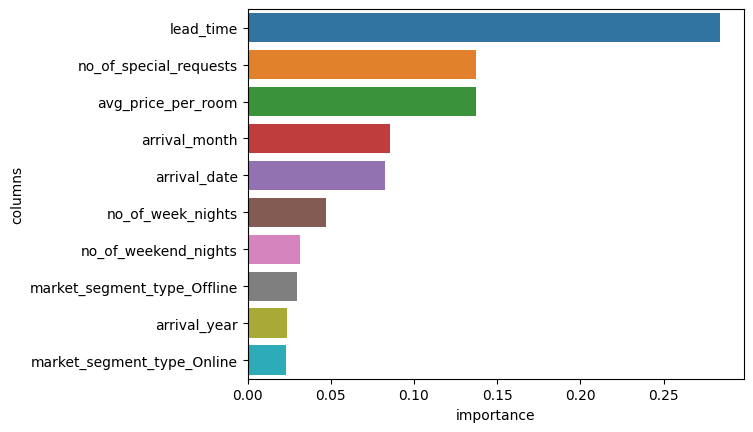

In [19]:
sns.barplot(importances_top10, x='importance', y='columns');

## Criando um modelo com `SelectFromModel`

Podemos automatizar essa parte de seleção das melhores features baseadas em um modelo, utilizando a `SelectFromModel`. Por meio dela, podemos passar um modelo (treinado ou não, quando treinado, use `prefit=True`) e escolher a quantidade de features que queremos pelo parâmetro `max_features`.

In [20]:
from sklearn.feature_selection import SelectFromModel

feature_selection = SelectFromModel(model, max_features=10, prefit=True)

Podemos utilizar o método `transform` para extrair as features desejadas da nossa base de dados. Isso deve ser feito tanto para `X_train` quanto para `X_test` para manter a consistência na quantidade de colunas.

In [21]:
X_train_featselected = feature_selection.transform(X_train)
X_test_featselected = feature_selection.transform(X_test)

X_train_featselected

c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[  4.  ,  61.  ,   7.  ,  23.  , 121.5 ,   0.  ],
       [  3.  , 232.  ,   9.  ,  15.  ,  80.75,   0.  ],
       [  2.  , 188.  ,   6.  ,  15.  , 130.  ,   0.  ],
       ...,
       [  2.  , 263.  ,  10.  ,  21.  , 110.  ,   0.  ],
       [  4.  , 109.  ,   4.  ,  25.  ,  80.75,   2.  ],
       [  4.  ,  40.  ,   8.  ,  31.  , 113.25,   0.  ]])

Criando um modelo somente com as features selecionadas:

In [22]:
model = RandomForestClassifier(random_state=2)
model.fit(X_train_featselected, y_train)

RandomForestClassifier(random_state=2)

In [23]:
model.score(X_test_featselected, y_test)

0.8976962124170246

Podemos observar que houve uma queda no score do modelo. Ainda é um resultado de alto, obtido com menos features. Esse é um trade-off a se analisar.

## Selecionando features com SelectKBest

Outra opção para seleção de features é a `SelectKBest`. Essa não necessita de um modelo para fazer a seleção, utilizando outra estratégia para obter este resultado. Ela não é abordada na aula, mas é comentada (brevemente e sem exemplos) neste artigo: 

https://cursos.alura.com.br/course/classificacao-selecionando-features/task/142468

## Usando `GridSearchCV` e `SelectFromModel`

Vamos realizar uma validação cruzada com `GridSearchCV`, utilizando os dados de treino (sem as features seleciondas) para verificar a consistência do score obtido e os melhores valores para alguns hiperparâmetros. Depois disso, vamos usar o melhor modelo otimizado encontrado pelo `GridSearchCV` para treinarmos com as melhores features encontradas pelo `SelectFromModel`.

Observe que quando passamos um valor inteiro ao parâmetro `cv` do `GridSearchCV`, ele irá criar um `StratifiedKFold` com o número de folds especificado pelo valor que passamos, sem a necessidade de instanciar um `StratifiedKFold`:

In [24]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=2)

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None,10,20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}

grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='accuracy',
    cv=5
)

**Atenção**: Esse fit vai demorar bastante (comigo foram cerca de **20 minutos**).

Vou salvá-lo em um arquivo pickle e comentar o fit. O arquivo pickle é muito grande, então **não** será versionado. Caso esteja rodando este código pela primeira vez, descomente os códigos abaixo para rodar novamente o fit e salvá-lo em um arquivo. Outros códigos neste notebook também irão demorar bastante e irei informar quando isso ocorrer; para eles, pode seguir esses mesmos passos.

In [25]:
# grid_search.fit(X_train, y_train)

Descomente se quiser salvar novamente no arquivo pickle.

In [26]:
# import pickle

# with open('grid_search.pkl', 'wb') as pickleFile:
#     pickle.dump(grid_search, pickleFile)

Usando o grid_search fittado que foi salvo no arquivo pickle:

In [27]:
grid_search = pd.read_pickle('grid_search.pkl')

In [28]:
grid_search.best_score_

0.9162410482917476

In [29]:
pd.DataFrame(grid_search.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.356064,0.990642,0.169559,0.036778,None,1,2,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.918636,0.916335,0.911506,0.916736,0.912971,0.915237,0.002610,3
1,8.814367,3.097541,0.328026,0.122406,None,1,2,200,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.918636,0.918636,0.912552,0.915900,0.914017,0.915948,0.002438,2
2,12.215885,2.281453,0.630180,0.193014,None,1,2,300,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.920310,0.918636,0.912343,0.916527,0.913389,0.916241,0.003023,1


In [30]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Podemos obter o modelo encontrado pelo grid search com os hiperparâmetros mais otimizados por meio do atributo `best_estimator_`

In [31]:
grid_search.best_estimator_

RandomForestClassifier(n_estimators=300, random_state=2)

In [32]:
grid_search.best_estimator_.score(X_train, y_train)

0.9952305246422893

Dica: se quiser, também pode salvar o best_estimator_ em uma variável para armazenar o modelo otimizado e começar a utilizá-lo (este modelo já vai estar com os hiperparâmetros otimizados e fittado com X_train).

Selecionando as features do melhor modelo encontrado pelo grid search e avaliando a acurácia:

In [33]:
feature_selection = SelectFromModel(grid_search.best_estimator_, max_features=10, prefit=True)

In [34]:
feature_selection

SelectFromModel(estimator=RandomForestClassifier(n_estimators=300,
                                                 random_state=2),
                max_features=10, prefit=True)

In [35]:
X_train_featselected = feature_selection.transform(X_train)
X_test_featselected = feature_selection.transform(X_test)

c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Treinando um modelo com as melhores features e os melhores hiperparâmetros:

In [36]:
model_featselected = grid_search.best_estimator_
model_featselected.fit(X_train_featselected, y_train)

RandomForestClassifier(n_estimators=300, random_state=2)

Dica: não é recomendado fazer um fit em um modelo já fittado (`best_estimator_` já foi treinado com X_train durante o grid search), pois você vai estar sobrescrevendo seu modelo. Neste caso, o melhor seria criar um modelo novo usando os `best_params_`. Na aula, no entanto, o instrutor sobrescreveu, e no fórum disseram que isso não tem problema porque model_featselected recebeu uma instância de `best_estimator_`, ou seja, podemos acessar `best_estimator_` para obter o modelo anterior. Eu ainda acho melhor começar um modelo do zero e só aproveitar os `best_params_` caso minha intenção seja um novo treinamento com uma base de treino diferente.

In [37]:
model_featselected.score(X_test_featselected, y_test)

0.8973057399453338

Obtemos um resultado equivalente ao modelo anterior, mas agora sabemos que ele está usando os melhores hiperparâmetros e as melhores features, de acordo com o que definimos.

Vamos analisar as métricas obtidas com esse modelo. Podemos criar uma matriz de confusão e visualizá-la com o heatmap (é uma alternativa ao `ConfusionMatrixDisplay`)

In [38]:
from sklearn.metrics import confusion_matrix

y_pred = model_featselected.predict(X_test_featselected)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[4650,  472],
       [ 580, 4542]], dtype=int64)

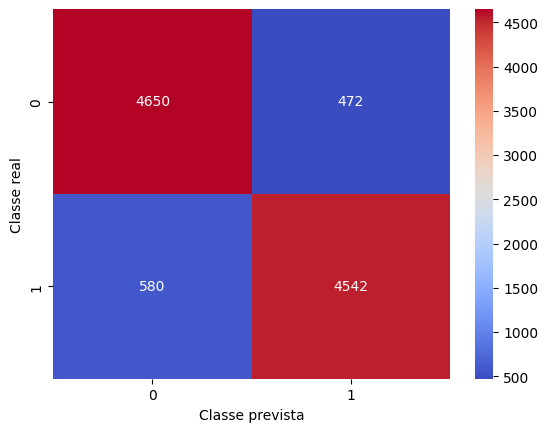

In [39]:
# fmt='d' will print values as integers
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Classe prevista')
plt.ylabel('Classe real')
plt.show();

Também podemos montar nossa própria curva ROC usando funções da matplotlib.

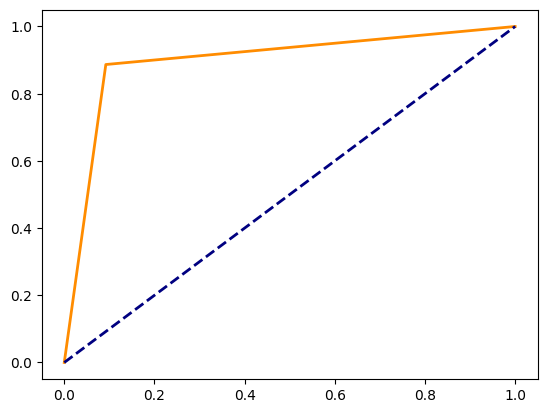

In [40]:
from sklearn.metrics import roc_curve, auc

# false positive rates, true positive rates, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.show();

In [41]:
roc_auc = auc(fpr, tpr)
roc_auc

0.8973057399453339

## Selecionando features com `RFE`

RFE: Recursive Feature Elimination

O RFE é outra estratégia de seleção de features que utiliza um modelo e que vai recursivamente eliminando features menos importantes e retreinando até chegar no número desejado de features.

Vamos usar um modelo com os hiperparâmetros que foram otimizados anteriormente pelo grid search.

In [42]:
model = RandomForestClassifier(**grid_search.best_params_, random_state=2)

Esse fit também demora um pouco (comigo foram cerca de 7 minutos). Não salvei em arquivo.

In [43]:
from sklearn.feature_selection import RFE

# step=1 means 1 feature is removed on each iteration. It's the default value
feature_selection_rfe = RFE(model, n_features_to_select=10, step=1)

X_train_featselected_rfe = feature_selection_rfe.fit_transform(X_train, y_train)
X_test_featselected_rfe = feature_selection_rfe.transform(X_test)

In [44]:
model.fit(X_train_featselected_rfe, y_train)

RandomForestClassifier(n_estimators=300, random_state=2)

In [45]:
model.score(X_test_featselected_rfe, y_test)

0.9126317844591956

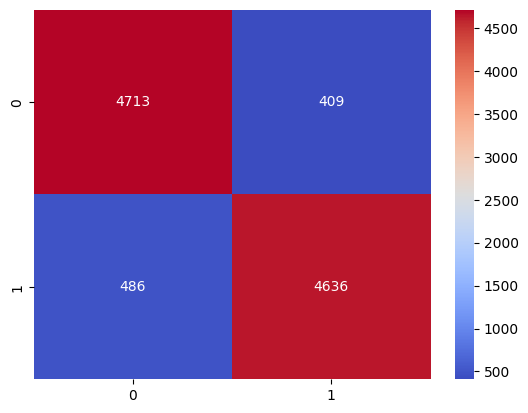

In [46]:
y_pred = model.predict(X_test_featselected_rfe)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, fmt='d');

Podemos **verificar quais features foram selecionadas pelo RFE**:

In [47]:
feature_selection_rfe.get_feature_names_out()

array(['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights',
       'lead_time', 'arrival_month', 'arrival_date', 'avg_price_per_room',
       'no_of_special_requests', 'market_segment_type_Offline',
       'market_segment_type_Online'], dtype=object)

## Selecionando features com `RFECV`

Esta é uma versão extendida do RFE, que aplica validação cruzada nos treinamentos. Ela também possui parâmetros adicionais:

- `min_features_to_select` indica a quantidade mínima de features a serem selecionadas, que seria a condição de parada. Ou seja, para o RFECV não dizemos quantas features queremos que seja selecionada - isso será decidido por ele com base na métrica que passarmos via o parâmetro `scoring`, o modelo obtido nas validações cruzadas que tiver o melhor scoring é o escolhido.

Por ser uma classificação cruzada e ir eliminando features até `min_features_to_select`, essa técnica pode ser bem demorada.

Vamos utilizar uma métrica diferente dessa vez, a roc_auc (o professor não explicou por que escolheu essa métrica dessa vez ao invés do accuracy, só disse que é uma medida mais robusta). 

In [48]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model = RandomForestClassifier(**grid_search.best_params_, random_state=2)

cv = StratifiedKFold(shuffle=True, random_state=500)

feature_selection_rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring='roc_auc',
    min_features_to_select=1, # 1 is already the default
    importance_getter='auto'
)

**Atenção**: Mais um fit demorado (19min). Este eu salvei em um arquivo.

In [49]:
# feature_selection_rfecv.fit(X_train, y_train)

In [50]:
# import pickle

# with open('feature_selection_rfecv.pkl', 'wb') as pickleFile:
#     pickle.dump(feature_selection_rfecv, pickleFile)

In [51]:
feature_selection_rfecv = pd.read_pickle('feature_selection_rfecv.pkl')

Diferente do RFE, o fit do RFECV já retorna o melhor modelo encontrado pelo RFECV nele próprio. Ou seja, já podemos utilizá-lo para ver o score e fazer predições.

Vamos ver alguns resultados obtidos com ele.

In [52]:
print(f'O número ideal de features encontrado é: {feature_selection_rfecv.n_features_}')

O número ideal de features encontrado é: 25


In [53]:
print('Ranking das features (rank = 1 indica as features selecionadas)')
features_rank_df = pd.DataFrame({
    'feature': X_train.columns,
    'rank': feature_selection_rfecv.ranking_
}).sort_values(by='rank')
features_rank_df

Ranking das features (rank = 1 indica as features selecionadas)


,feature,rank
0,no_of_adults,1
27,market_segment_type_Corporate,1
26,market_segment_type_Complementary,1
23,room_type_reserved_Room_Type 6,1
22,room_type_reserved_Room_Type 5,1
21,room_type_reserved_Room_Type 4,1
19,room_type_reserved_Room_Type 2,1
18,room_type_reserved_Room_Type 1,1
17,type_of_meal_plan_Not Selected,1
15,type_of_meal_plan_Meal Plan 2,1


O `cv_results_` vai trazer os resultados das validações cruzadas **por número de features** (de acordo com `min_features_to_select`), em ordem ascendente.

In [54]:
cv_results_df = pd.DataFrame(feature_selection_rfecv.cv_results_)
cv_results_df

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,0.761543,0.022305,0.779135,0.772846,0.718016,0.763933,0.773788
1,0.878398,0.005135,0.883055,0.876403,0.884802,0.877334,0.870395
2,0.904587,0.002565,0.908623,0.903489,0.906009,0.903799,0.901014
3,0.944911,0.002156,0.946520,0.943198,0.947802,0.945170,0.941863
4,0.955263,0.002360,0.957763,0.954728,0.957545,0.955022,0.951257
5,0.957131,0.002141,0.959940,0.956070,0.958363,0.957637,0.953647
6,0.961721,0.001430,0.963383,0.961825,0.962532,0.961751,0.959114
7,0.961946,0.001346,0.963261,0.961853,0.962591,0.962618,0.959406
8,0.965089,0.001268,0.966287,0.965112,0.965785,0.965594,0.962669
9,0.965451,0.001407,0.967181,0.965770,0.965809,0.965624,0.962872


Vamos plotar o resultado da métrica por número de features (índice do dataframe `cv_results_df` + 1)

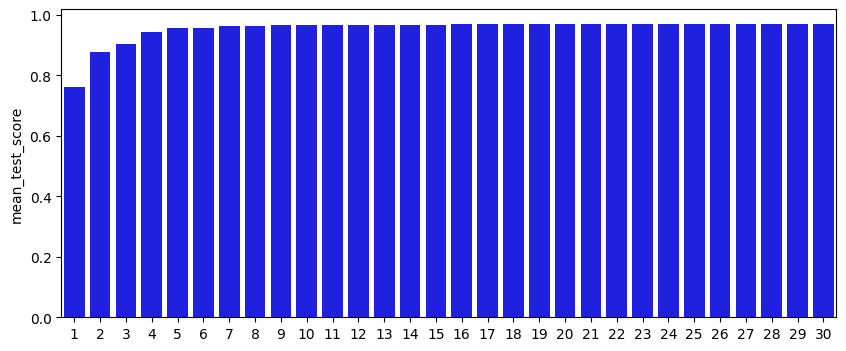

In [55]:
plt.figure(figsize=(10,4))
sns.barplot(x=cv_results_df.index+1, y='mean_test_score', data=cv_results_df, color='blue');

É interessante observar que com um mínimo de 6 features, a métrica escolhida já apresenta um resultado alto, com pouca variação para um número de features maior.

Analisando os resultados obtidos com o modelo (aqui usamos o X_test, sem aplicar algum tipo de transform, pois o modelo sabe quais features ele deve considerar na hora do predict).

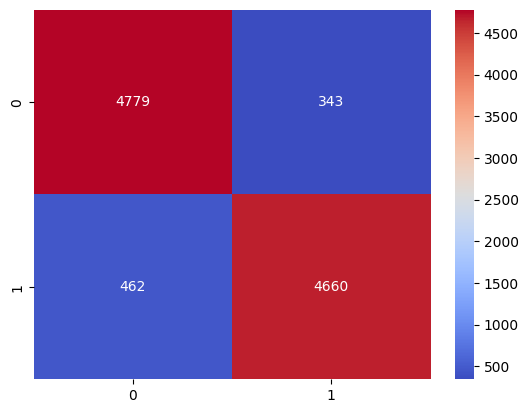

In [56]:
y_pred = feature_selection_rfecv.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, fmt='d');

## Conclusão

A principal conclusão deste curso é que podemos coletar e armazenar uma quantidade menor de dados para um problema específico. 

Ao selecionarmos as features e encontrarmos um modelo que ainda performa bem para a métrica (ou métricas) de nosso interesse, podemos decidir que alguns dados não precisam mais ser coletados nem armazenados (as colunas não utilizadas). Num cenário em que é preciso coletar ativamente uma informação, coletar um número menor de dados pode trazer mais eficiência de armazenamento, tempo (e talvez de dinheiro). 

Usando técnicas como a RFECV, podemos ainda ver como os modelos se comportam com quantidades diferentes de features, o que pode nos levar a decidir por quantidade de features ainda menores. Tudo vai depender da sua análise para outros problemas, do seu domínio sobre o problema e da importância/relevância de cada feature no dataset (não somente para o modelo, mas para outras análises em geral sobre os dados coletados).